In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models
import warnings
warnings.filterwarnings('ignore')

In [26]:
# Load the breast cancer dataset
breast_cancer_dataset = datasets.load_breast_cancer()

# Convert to DataFrame
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns=breast_cancer_dataset.feature_names)
data_frame['label'] = breast_cancer_dataset.target

# Separate features and target
X = data_frame.drop(columns='label')
Y = data_frame['label']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [28]:
# Standardize the features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [30]:
# Build the Neural Network model
model = models.Sequential([
    layers.Flatten(input_shape=(X_train_std.shape[1],)),
    layers.Dense(20, activation='relu'),
    layers.Dense(2, activation='softmax')  # Use softmax for multi-class classification
])

In [32]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
# Train the Neural Network
history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5317 - loss: 0.7466 - val_accuracy: 0.8696 - val_loss: 0.4898
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8212 - loss: 0.4648 - val_accuracy: 0.9348 - val_loss: 0.3207
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9149 - loss: 0.3159 - val_accuracy: 0.9565 - val_loss: 0.2422
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9185 - loss: 0.2827 - val_accuracy: 0.9565 - val_loss: 0.2010
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9305 - loss: 0.2332 - val_accuracy: 0.9783 - val_loss: 0.1776
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9604 - loss: 0.1858 - val_accuracy: 0.9783 - val_loss: 0.1612
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9415 - loss: 0.1655 - val_accuracy: 0.9783 - val_loss: 0.1495
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9411 - loss: 0.1784 - val_accuracy: 0.9783 - val_loss

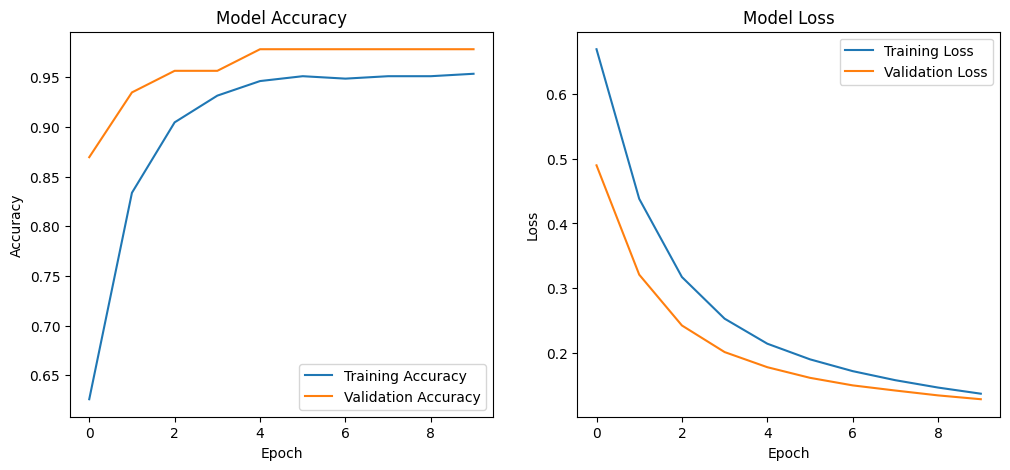

In [35]:
# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

In [36]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_std, Y_test)
print(f'Test Accuracy: {accuracy:.4f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9714 - loss: 0.1410 
Test Accuracy: 0.9649


In [38]:
# Function to predict tumor type
def predict_tumor(input_data):
    input_data_as_numpy_array = np.asarray(input_data)
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
    input_data_std = scaler.transform(input_data_reshaped)
    prediction = model.predict(input_data_std)
    prediction_label = np.argmax(prediction)
    return 'Malignant' if prediction_label == 0 else 'Benign'

In [39]:
# Test with new input data
new_input_data = [
    [20.57, 17.77, 132.9, 1326.0, 0.08474, 0.07864, 0.0869, 0.07017, 0.1812, 0.05667,
     0.4771, 1.141, 3.457, 74.08, 0.00522, 0.01938, 0.02467, 0.01112, 0.01466, 0.00277,
     24.99, 23.41, 158.8, 1956.0, 0.1238, 0.1866, 0.2416, 0.186, 0.275, 0.08902]
]

for data in new_input_data:
    result = predict_tumor(data)
    print(f'The tumor prediction for the given data is: {result}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
The tumor prediction for the given data is: Malignant
